<h1>1. Выбор данных</h1>

Abalone Data Set - http://archive.ics.uci.edu/ml/datasets/Abalone


<h1>2. Установка внешних библиотек</h1>

In [ ]:
# Устанавливаем необходимые библиотеки

!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scikit-learn

<h1>3. Демонстрирование путей установки</h1>

In [ ]:
import sys

print(sys.executable)
print(pd.__file__)
print(np.__file__)
print(plt.__file__)
print(sns.__file__)
print(sklearn.__file__)

<h1>4. Импорт библиотек</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC

<h1>5. Описание данных</h1>

Предсказание возраста морского ушка (моллюски) по физическим измерениям. Возраст морского ушка определяется путем разрезания раковины через конус, окрашивания ее и подсчета количества колец под микроскопом - скучная и трудоемкая задача. Другие измерения, которые легче получить, используются для прогнозирования возраста. Для решения проблемы может потребоваться дополнительная информация, такая как погодные условия и местоположение (следовательно, наличие продуктов питания).

**Название / Тип Данных / Единица измерения / Описание**

* Sex - Пол / номинальный / -- / M (мужчина), F (женщина) и I (младенец)
* Length - Длина / непрерывная / мм / Измерение самой длинной оболочки
* Diameter - Диаметр / непрерывный / мм / перпендикулярный длине
* Height - Высота / непрерывная / мм / с мясом в скорлупе
* Whole_weight - Весь вес / непрерывный / грамм / целое морское ушко
* Shucked_weight - Очищенный вес / непрерывный / грамм / вес мяса
* Viscera_weight - Вес внутренних органов / непрерывный / грамм / вес кишечника (после кровотечения)
* Shell_weight - Вес скорлупы / непрерывный / грамм / после сушки
* Rings - Кольца / целое число / -- / +1.5 дает возраст в годах

# Подготовка данных

In [3]:
# Импортируем данные
names = [
    'Sex', 'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

df = pd.read_csv('abalone.csv', names=names)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [39]:
df['Whole_weight_class'] = np.where(df.Whole_weight > 1, 1, 0)

In [40]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0
...,...,...,...,...,...,...,...,...,...,...
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8,0
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1


<h1>6. Подготовка данных</h1>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3354 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 3354 non-null   object 
 1   Length              3354 non-null   float64
 2   Diameter            3354 non-null   float64
 3   Height              3354 non-null   float64
 4   Whole_weight        3354 non-null   float64
 5   Shucked_weight      3354 non-null   float64
 6   Viscera_weight      3354 non-null   float64
 7   Shell_weight        3354 non-null   float64
 8   Rings               3354 non-null   int64  
 9   Whole_weight_class  3354 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 288.2+ KB


In [42]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
count,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000
mean,0.527676,0.410744,0.139377,0.780756,0.338851,0.170177,0.225660,9.992844,0.299642
std,0.086832,0.072301,0.027955,0.352680,0.162127,0.080335,0.099052,2.861232,0.458170
min,0.295000,0.225000,0.085000,0.110500,0.040500,0.017500,0.032000,4.000000,0.000000
25%,0.465000,0.360000,0.120000,0.486125,0.205125,0.104000,0.145000,8.000000,0.000000
50%,0.537500,0.420000,0.140000,0.780000,0.327250,0.166000,0.225000,9.000000,0.000000
75%,0.600000,0.470000,0.160000,1.064875,0.463375,0.231000,0.301000,11.000000,1.000000
max,0.720000,0.585000,0.205000,1.785500,0.731500,0.358500,0.454500,26.000000,1.000000


In [44]:
target = "Whole_weight_class"
features = [
    'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>,
        <Axes: title={'center': 'Whole_weight_class'}>]], dtype=object)

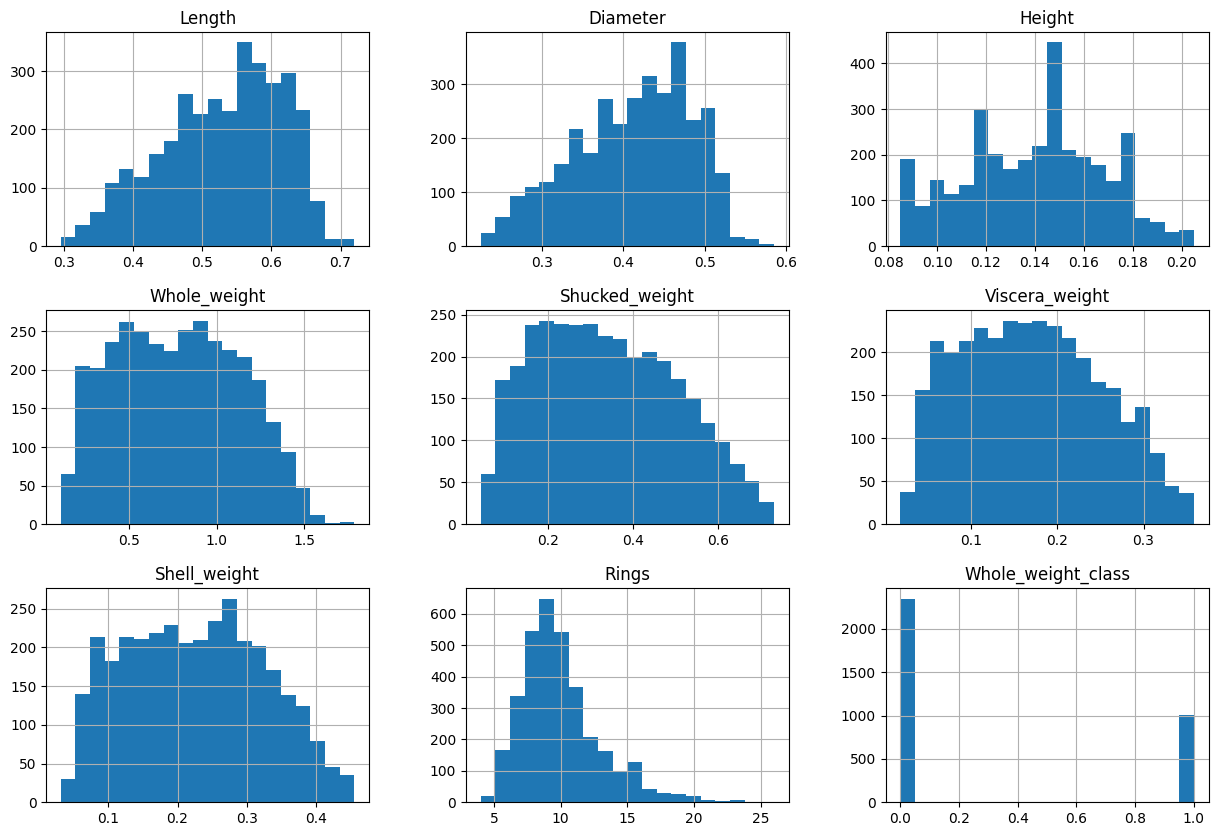

In [45]:
df.hist(figsize=(15, 10), bins=20)

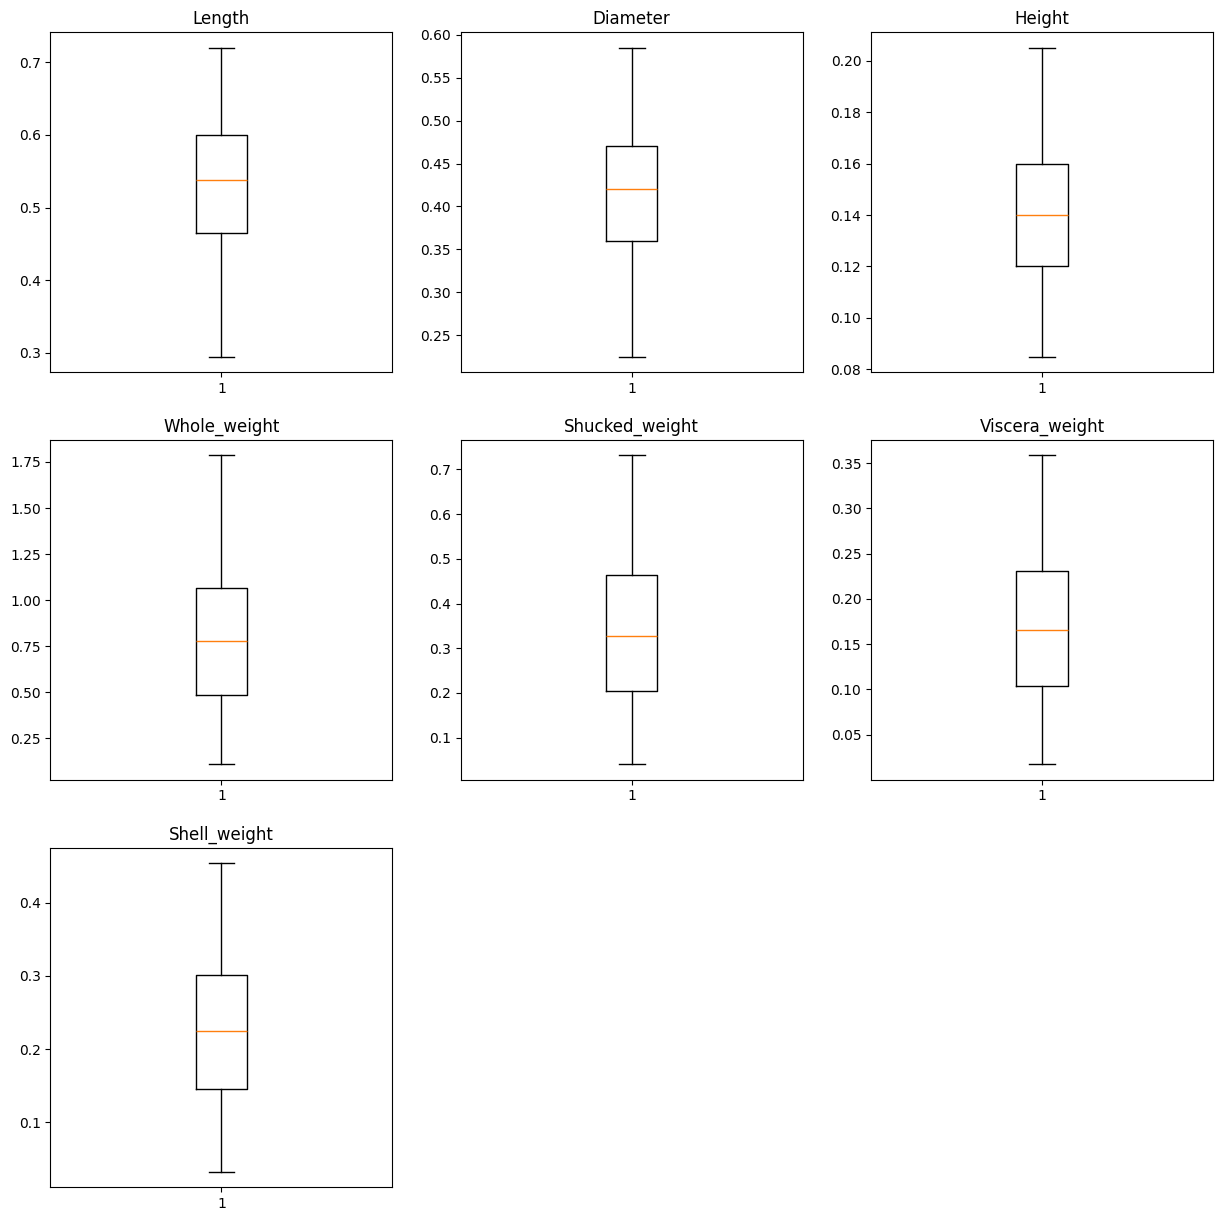

In [46]:
fig = plt.figure(figsize=(15, 15))

for i in range(1, 8):
   ax = fig.add_subplot(3, 3, i)
   ax.boxplot(x = df[features[i-1]])
   ax.set_title(features[i-1])

Удаляем найденные вбросы

In [26]:
lower_bound = df['Length'].quantile(q=0.025)
print(lower_bound)
df=df[df['Length'] > lower_bound]

0.25


In [27]:
lower_bound = df['Diameter'].quantile(q=0.025)
print(lower_bound)
df=df[df['Diameter'] > lower_bound]

0.22


In [28]:
upper_bound = df['Height'].quantile(q=0.975)
lower_bound = df['Height'].quantile(q=0.025)
print(upper_bound)
print(lower_bound)
df=df[df['Height'] < upper_bound]
df=df[df['Height'] > lower_bound]

0.21
0.08


In [29]:
upper_bound = df['Whole_weight'].quantile(q=0.975)
print(upper_bound)
df=df[df['Whole_weight'] < upper_bound]

1.787


In [33]:
upper_bound = df['Shucked_weight'].quantile(q=0.975)
print(upper_bound)
df=df[df['Shucked_weight'] < upper_bound]

0.73175


In [34]:
upper_bound = df['Viscera_weight'].quantile(q=0.975)
print(upper_bound)
df=df[df['Viscera_weight'] < upper_bound]

0.3595


In [35]:
upper_bound = df['Shell_weight'].quantile(q=0.975)
print(upper_bound)
df=df[df['Shell_weight'] < upper_bound]

0.45451250000000004


In [47]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0
...,...,...,...,...,...,...,...,...,...,...
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8,0
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1


<Axes: >

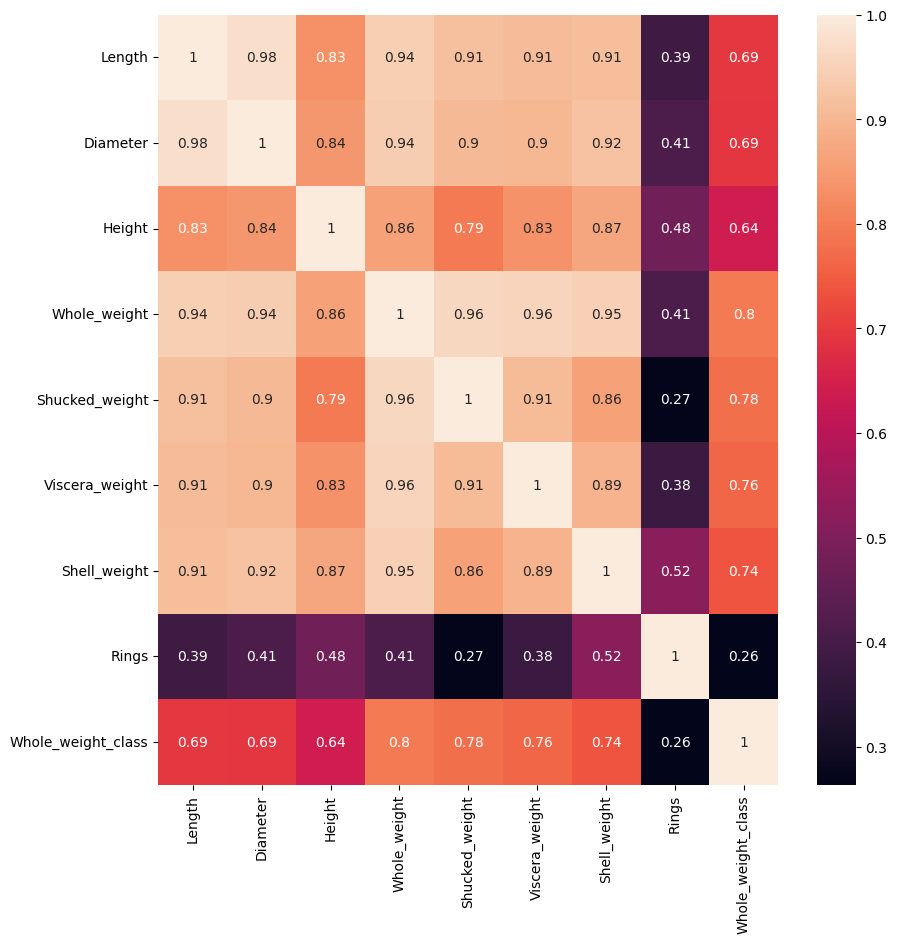

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Задaние 9

Выбираем в качестве факторов Perimeter и Major_Axis_Length тк у них наивысшая корелляция с Class

In [54]:
current_feature = ["Whole_weight","Shucked_weight"]

In [51]:
cdf = df[['Whole_weight_class', 'Whole_weight','Shucked_weight']]
cdf

,Whole_weight_class,Whole_weight,Shucked_weight
0,0,0.5140,0.2245
1,0,0.2255,0.0995
2,0,0.6770,0.2565
3,0,0.5160,0.2155
5,0,0.3515,0.1410
...,...,...,...
4171,0,0.8675,0.4000
4172,0,0.8870,0.3700
4173,0,0.9660,0.4390
4174,1,1.1760,0.5255


In [52]:
train, test = train_test_split(cdf, test_size=0.25, random_state=19)
train.shape, test.shape

((2515, 3), (839, 3))

In [60]:
X_train, y_train = train[current_feature], train[target]
X_train.shape, y_train.shape

((2515, 2), (2515,))

In [56]:
X_test, y_test = test[current_feature], test[target]
X_test.shape, y_test.shape

((839, 2), (839,))

In [61]:
X_train = X_train.values.reshape(2515,2)
y_train = y_train.values.reshape(2515,1)
X_test = X_test.values.reshape(839,2)
y_test = y_test.values.reshape(839,1)

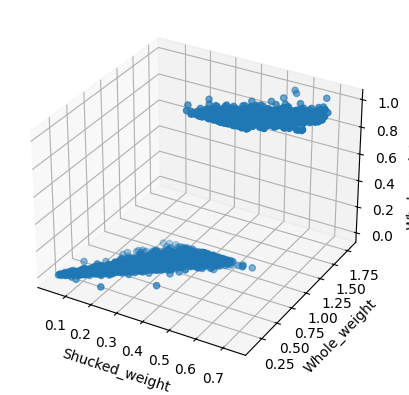

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#Построим график рассеивания
x = cdf['Shucked_weight']
y = cdf['Whole_weight']
z = cdf['Whole_weight_class']

ax.scatter(x, y, z)
ax.set_xlabel("Shucked_weight")
ax.set_ylabel("Whole_weight")
ax.set_zlabel("Whole_weight_class")

plt.show()

Text(0, 0.5, 'Shucked_weight')

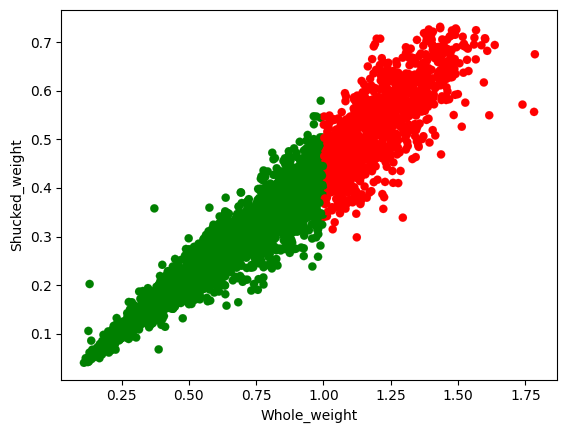

In [65]:
plt.figure(1)
color = ['green' if e == 0 else 'red' for e in cdf[target]]
plt.scatter(cdf['Whole_weight'], cdf['Shucked_weight'], color = color, linewidths=0.1)
plt.xlabel('Whole_weight')
plt.ylabel('Shucked_weight')


In [66]:
model = SVC()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [67]:
y_test[:10]

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [68]:
model.predict(X_test[:10])

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [69]:
X_test[:10]

array([[0.247 , 0.1225],
       [0.97  , 0.342 ],
       [1.1415, 0.4515],
       [1.337 , 0.5995],
       [1.2975, 0.6035],
       [1.4635, 0.6615],
       [0.3245, 0.132 ],
       [0.3   , 0.124 ],
       [0.8365, 0.315 ],
       [0.7275, 0.343 ]])

In [73]:
model.score(X_test,y_test.astype('int'))

1.0

In [74]:
mean_absolute_error(y_test,model.predict(X_test))

0.0

In [75]:
mean_squared_error(y_test,model.predict(X_test))

0.0